In [1]:
import os
import numpy as np
import glob
import PIL.Image as Image
from tqdm.notebook import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

Check if we are running on GPU

In [2]:
if torch.cuda.is_available():
    print("The code will run on GPU.")
else:
    print("The code will run on CPU. Go to Edit->Notebook Settings and choose GPU as the hardware accelerator")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

The code will run on GPU.


In [4]:
class Hotdog_NotHotdog(torch.utils.data.Dataset):
    def __init__(self, train, transform, data_path='/zhome/21/8/156030/02516/hotdog_nothotdog'):
        'Initialization'
        self.transform = transform
        data_path = os.path.join(data_path, 'train' if train else 'test')
        image_classes = [os.path.split(d)[1] for d in glob.glob(data_path +'/*') if os.path.isdir(d)]
        image_classes.sort()
        self.name_to_label = {c: id for id, c in enumerate(image_classes)}
        self.image_paths = glob.glob(data_path + '/*/*.jpg')
        
    def __len__(self):
        'Returns the total number of samples'
        return len(self.image_paths)

    def __getitem__(self, idx):
        'Generates one sample of data'
        image_path = self.image_paths[idx]
        
        image = Image.open(image_path)
        c = os.path.split(os.path.split(image_path)[0])[1]
        y = self.name_to_label[c]
        X = self.transform(image)
        return X, y

In [ ]:
# Rotating, scaling, flipping, noise, color, crop
size = 128
# crop_size = (80, 80)
degree = 20
color_jit = [0.2, 0.15, 0.1, 0.15]
affine = [20, (0.2,0.3), None, 30]
gaus_kernel = (5, 5)
train_transform = transforms.Compose([transforms.RandomRotation(degrees=degree),
                                    # transforms.RandomAffine(*affine),
                                    # transforms.RandomCrop(crop_size),
                                    transforms.GaussianBlur(gaus_kernel, sigma=(0.01, 2.0)),
                                    transforms.RandomHorizontalFlip(p=0.3),
                                    transforms.RandomVerticalFlip(p=0.3),
                                    transforms.ColorJitter(*color_jit),  
                                    transforms.Resize((size, size)), 
                                    transforms.ToTensor()])

test_transform = transforms.Compose([transforms.RandomRotation(degrees=degree),
                                    # transforms.RandomAffine(*affine),
                                    # transforms.RandomCrop(crop_size),
                                    transforms.GaussianBlur(gaus_kernel, sigma=(0.01, 2.0)),
                                    transforms.RandomHorizontalFlip(p=0.3),
                                    transforms.RandomVerticalFlip(p=0.3),
                                    transforms.ColorJitter(*color_jit),  
                                    transforms.Resize((size, size)), 
                                    transforms.ToTensor()])

In [31]:
size = (375, 500)
train_transform = transforms.Compose([transforms.Resize(size), 
                                    transforms.ToTensor()])
test_transform = transforms.Compose([transforms.Resize(size), 
                                    transforms.ToTensor()])
train_transform = transforms.ToTensor()
test_transform = transforms.ToTensor()

batch_size = 64
trainset = Hotdog_NotHotdog(train=True, transform=train_transform)
train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=3)
testset = Hotdog_NotHotdog(train=False, transform=test_transform)
test_loader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=3)

In [11]:
trainset.image_paths

['/zhome/21/8/156030/02516/hotdog_nothotdog/train/nothotdog/people (515).jpg',
 '/zhome/21/8/156030/02516/hotdog_nothotdog/train/nothotdog/food (9).jpg',
 '/zhome/21/8/156030/02516/hotdog_nothotdog/train/nothotdog/people (290).jpg',
 '/zhome/21/8/156030/02516/hotdog_nothotdog/train/nothotdog/pets (494).jpg',
 '/zhome/21/8/156030/02516/hotdog_nothotdog/train/nothotdog/food (137).jpg',
 '/zhome/21/8/156030/02516/hotdog_nothotdog/train/nothotdog/people (68).jpg',
 '/zhome/21/8/156030/02516/hotdog_nothotdog/train/nothotdog/pets (367).jpg',
 '/zhome/21/8/156030/02516/hotdog_nothotdog/train/nothotdog/food (35).jpg',
 '/zhome/21/8/156030/02516/hotdog_nothotdog/train/nothotdog/pets (280).jpg',
 '/zhome/21/8/156030/02516/hotdog_nothotdog/train/nothotdog/pets (619).jpg',
 '/zhome/21/8/156030/02516/hotdog_nothotdog/train/nothotdog/people (2).jpg',
 '/zhome/21/8/156030/02516/hotdog_nothotdog/train/nothotdog/pets (66).jpg',
 '/zhome/21/8/156030/02516/hotdog_nothotdog/train/nothotdog/pets (446).jpg'

## Data statistics

plot images

In [32]:
images, labels = next(iter(train_loader))
plt.figure(figsize=(20,20))

for i in range(len(images)):
    plt.subplot(int(len(images)/7) + 1,7,i+1)
    plt.imshow(np.swapaxes(np.swapaxes(images[i].numpy(), 0, 2), 0, 1))
    plt.title(['hotdog', 'not hotdog'][labels[i].item()])
    plt.axis('off')

RuntimeError: Caught RuntimeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/zhome/21/8/156030/02516/DL_02516/lib/python3.10/site-packages/torch/utils/data/_utils/worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)
  File "/zhome/21/8/156030/02516/DL_02516/lib/python3.10/site-packages/torch/utils/data/_utils/fetch.py", line 54, in fetch
    return self.collate_fn(data)
  File "/zhome/21/8/156030/02516/DL_02516/lib/python3.10/site-packages/torch/utils/data/_utils/collate.py", line 265, in default_collate
    return collate(batch, collate_fn_map=default_collate_fn_map)
  File "/zhome/21/8/156030/02516/DL_02516/lib/python3.10/site-packages/torch/utils/data/_utils/collate.py", line 142, in collate
    return [collate(samples, collate_fn_map=collate_fn_map) for samples in transposed]  # Backwards compatibility.
  File "/zhome/21/8/156030/02516/DL_02516/lib/python3.10/site-packages/torch/utils/data/_utils/collate.py", line 142, in <listcomp>
    return [collate(samples, collate_fn_map=collate_fn_map) for samples in transposed]  # Backwards compatibility.
  File "/zhome/21/8/156030/02516/DL_02516/lib/python3.10/site-packages/torch/utils/data/_utils/collate.py", line 119, in collate
    return collate_fn_map[elem_type](batch, collate_fn_map=collate_fn_map)
  File "/zhome/21/8/156030/02516/DL_02516/lib/python3.10/site-packages/torch/utils/data/_utils/collate.py", line 161, in collate_tensor_fn
    out = elem.new(storage).resize_(len(batch), *list(elem.size()))
RuntimeError: Trying to resize storage that is not resizable


Find width and height of images

In [54]:
len(trainset.image_paths)

2047

In [62]:
width

array([333, 500, 499, ..., 500, 333, 500])

0.0 / 100
10.0 / 100
20.0 / 100
30.0 / 100
40.0 / 100
50.0 / 100
60.0 / 100
70.0 / 100
80.0 / 100
90.0 / 100
100.0 / 100
{'train': {'hotdog': 1075, 'nothotdog': 972}, 'test': {'hotdog': 895, 'nothotdog': 967}}


<BarContainer object of 2 artists>

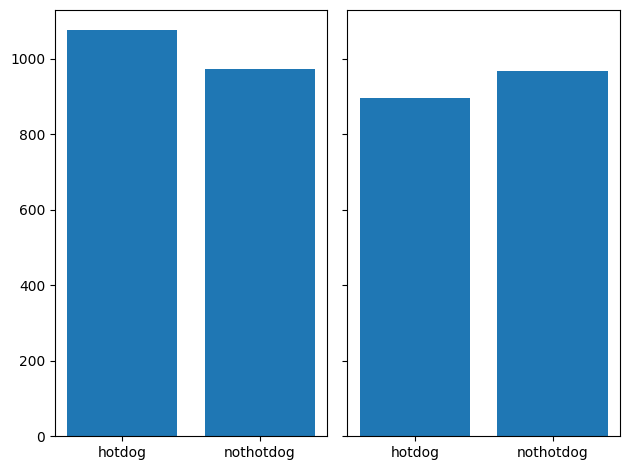

In [65]:
width = []
height = []
class_idx = dict(train=dict(hotdog=[], nothotdog=[]), test=dict(hotdog=[], nothotdog=[]))
no_classes = dict(train=dict(hotdog=0, nothotdog=0), test=dict(hotdog=0, nothotdog=0))
im_paths = trainset.image_paths + testset.image_paths
total_ims = len(trainset.image_paths + testset.image_paths)

for i, im_path in enumerate(im_paths):
    image = Image.open(im_path)
    w, h = image.size
    width.append(w)
    height.append(h)
    c = os.path.split(os.path.split(im_path)[0])[1]
    
    if i < len(trainset.image_paths):
        no_classes["train"][c] += 1
        class_idx["train"][c].append(i)
    else:
        no_classes["test"][c] += 1
        class_idx["test"][c].append(i)

    
    if i % (total_ims//10) == 0:
        print(f"{np.round(i/total_ims,2)*100} / 100")

width = np.array(width)
height = np.array(height)
print(no_classes)
# print(class_idx)
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].bar(list(no_classes["train"].keys()), list(no_classes["train"].values()))
axs[1].bar(list(no_classes["test"].keys()), list(no_classes["test"].values()))
# axs[0].hist([0]*no_classes["train"]["hotdog"] + [1]*no_classes["train"]["nothotdog"], n_bins=2)
# axs[1].hist([0]*no_classes["test"]["hotdog"] + [1]*no_classes["test"]["nothotdog"], n_bins=2)

    

Max width: 3150, max height: 2100
Min width: 61, min height: 61
Median width: 500.0, median height: 375.0


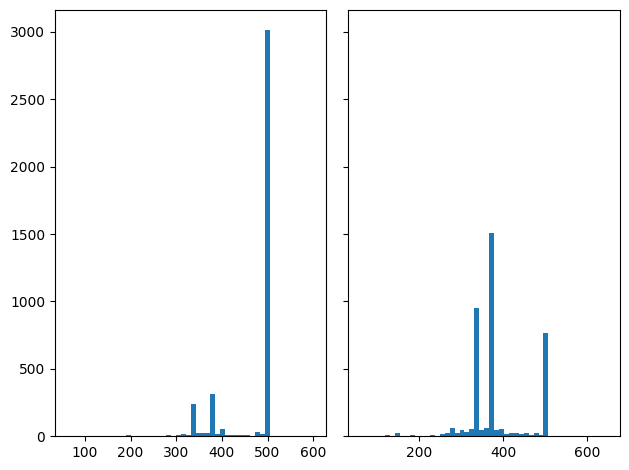

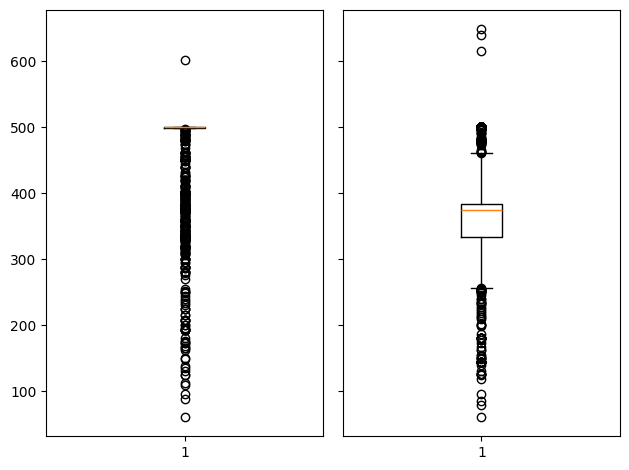

In [57]:
max_width = max(width)
max_height = max(height)
min_width = min(width)
min_height = min(height)

n_bins = 50
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

print(f"Max width: {max_width}, max height: {max_height}")
print(f"Min width: {min_width}, min height: {min_height}")
print(f"Median width: {np.median(width)}, median height: {np.median(height)}")
axs[0].hist(width[width < 750], bins=n_bins)
axs[1].hist(height[height < 750], bins=n_bins)
plt.show()

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].boxplot(width[width < 750])
axs[1].boxplot(height[height < 750])
plt.show()

Median width: 500.0, median height: 375.0
